Descenso de gradiente naïve con dirección de descenso aleatoria

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol):
    x = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for i in range(maxIter):
        direccion = np.random.randn(*x.shape)  # Dirección aleatoria
        direccion = direccion / np.linalg.norm(direccion)  # Normalizar la dirección
        x_new = x - alpha * direccion
        error = np.linalg.norm(x_new - x)
        
        iteraciones.append(x_new)
        valores_f.append(f(x_new))
        errores.append(error)
        
        if error < tol:
            return x_new, iteraciones, valores_f, errores, i + 1, True
        
        x = x_new
    
    return x, iteraciones, valores_f, errores, maxIter, False


Descenso máximo naïve

In [3]:
def descenso_maximo_naive(f, df, x0, alpha, maxIter, tol):
    x = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for i in range(maxIter):
        grad = df(x)
        x_new = x - alpha * grad
        error = np.linalg.norm(x_new - x)
        
        iteraciones.append(x_new)
        valores_f.append(f(x_new))
        errores.append(error)
        
        if error < tol:
            return x_new, iteraciones, valores_f, errores, i + 1, True
        
        x = x_new
    
    return x, iteraciones, valores_f, errores, maxIter, False


Descenso de Newton con Hessiano aproximado

In [4]:
def descenso_newton_aprox(f, df, ddf, x0, alpha, maxIter, tol):
    x = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for i in range(maxIter):
        grad = df(x)
        hess_aprox = np.eye(len(x))  
        direccion = np.linalg.solve(hess_aprox, grad)
        x_new = x - alpha * direccion
        error = np.linalg.norm(x_new - x)
        
        iteraciones.append(x_new)
        valores_f.append(f(x_new))
        errores.append(error)
        
        if error < tol:
            return x_new, iteraciones, valores_f, errores, i + 1, True
        
        x = x_new
    
    return x, iteraciones, valores_f, errores, maxIter, False


Descenso de Newton con Hessiano exacto

In [5]:
def descenso_newton_hessiano(f, df, ddf, x0, alpha, maxIter, tol):
    x = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for i in range(maxIter):
        grad = df(x)
        hess = ddf(x)  # Hessiano exacto
        direccion = np.linalg.solve(hess, grad)
        x_new = x - alpha * direccion
        error = np.linalg.norm(x_new - x)
        
        iteraciones.append(x_new)
        valores_f.append(f(x_new))
        errores.append(error)
        
        if error < tol:
            return x_new, iteraciones, valores_f, errores, i + 1, True
        
        x = x_new
    
    return x, iteraciones, valores_f, errores, maxIter, False


In [6]:
def f(x):
    return np.sum(x ** 2)

def df(x):
    return 2 * x

def ddf(x):
    return 2 * np.eye(len(x))

# Parámetros
x0 = np.array([10.0, -5.0])  # Punto inicial
alpha = 0.1  # Tamaño de paso
maxIter = 100  # Número máximo de iteraciones
tol = 1e-6  # Tolerancia

print("Descenso de gradiente naive con dirección aleatoria:")
resultado_aleatorio = descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol)
print("Resultado final:", resultado_aleatorio)

print("\nDescenso máximo naive:")
resultado_maximo = descenso_maximo_naive(f, df, x0, alpha, maxIter, tol)
print("Resultado final:", resultado_maximo)

print("\nDescenso de Newton con Hessiano aproximado:")
resultado_newton_aprox = descenso_newton_aprox(f, df, ddf, x0, alpha, maxIter, tol)
print("Resultado final:", resultado_newton_aprox)

print("\nDescenso de Newton con Hessiano exacto:")
resultado_newton_hess = descenso_newton_hessiano(f, df, ddf, x0, alpha, maxIter, tol)
print("Resultado final:", resultado_newton_hess)


Descenso de gradiente naive con dirección aleatoria:
Resultado final: (array([10.77272057, -4.44322056]), [array([10., -5.]), array([10.09816568, -5.01906563]), array([10.06803773, -4.92371205]), array([10.09580717, -4.8276451 ]), array([ 9.99633078, -4.81742511]), array([10.07947264, -4.87298976]), array([10.08567129, -4.97279746]), array([10.06954832, -5.07148915]), array([ 9.98119287, -5.02465631]), array([10.02919827, -4.93693242]), array([10.12292957, -4.97178128]), array([10.04482776, -4.90933045]), array([10.02793584, -5.00789344]), array([ 9.94341865, -4.95444397]), array([ 9.93886441, -4.85454773]), array([ 9.98791512, -4.76740401]), array([ 9.96014418, -4.86347052]), array([ 9.89256668, -4.93718133]), array([ 9.99252881, -4.93442961]), array([10.08268059, -4.89115539]), array([ 9.99415745, -4.8446403 ]), array([ 9.95447874, -4.75284923]), array([ 9.87207052, -4.6962022 ]), array([ 9.89124546, -4.79434659]), array([ 9.94501574, -4.71003315]), array([10.00444712, -4.62960983]),

### Función 1

$f(x, y) = x^4 + y^4 - 4xy + \frac{1}{2}y + 1$

In [7]:
def f1(x):
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1

def df1(x):
    dfdx1 = 4*x[0]**3 - 4*x[1]
    dfdx2 = 4*x[1]**3 - 4*x[0] + 0.5
    return np.array([dfdx1, dfdx2])

def ddf1(x):
    d2fdx1 = 12*x[0]**2
    d2fdx1dx2 = -4
    d2fdx2 = 12*x[1]**2 - 4
    return np.array([[d2fdx1, d2fdx1dx2], [d2fdx1dx2, d2fdx2]])



Método: Descenso Gradiente Naive Aleatorio f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[10. -5.]	0.001000	4056.039971
2		[ 9.99976852 -5.00097284]	0.001000	4055.807238
3		[10.00076816 -5.00094602]	0.001000	4056.995557
98		[ 9.99994317 -5.0006398 ]	0.001000	4056.000421
99		[ 9.99967279 -5.00160256]	0.001000	4055.721002
100		[10.00066829 -5.0016973 ]	0.001000	4056.909704

Método: Descenso Máximo Naive f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[10. -5.]	4.056040	4056.039971
2		[ 5.98   -4.4605]	0.951695	951.694647
3		[ 5.10676923 -4.08209449]	0.621873	621.873316
98		[ 0.89549726 -0.89214173]	0.008750	8.749859
99		[ 0.88905624 -0.88621946]	0.008632	8.631652
100		[ 0.88270045 -0.88037914]	0.008516	8.516178

Método: Descenso Newton Aprox. f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[10. -5.]	4.056040	4056.039971
2		[ 5.98   -4.4605]	0.951695	951.694647
3		[ 5.10676923 -4.08209449]	0.621873	621.873316
98		[ 0.89549726 -0.89214173]	0.008750	8.

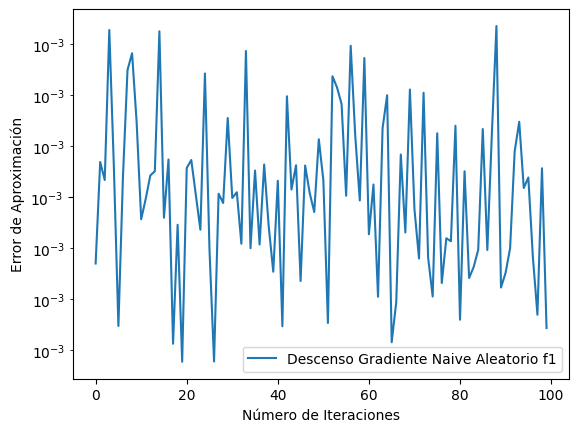

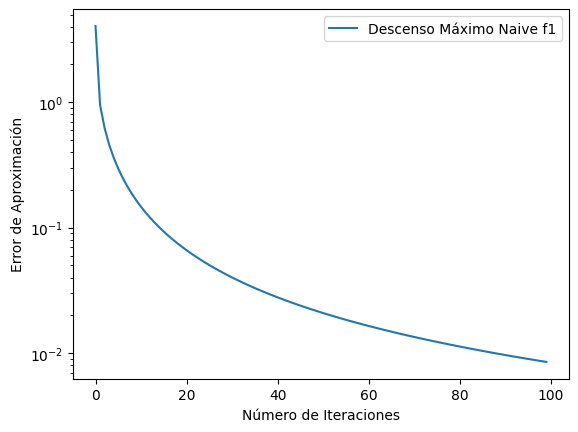

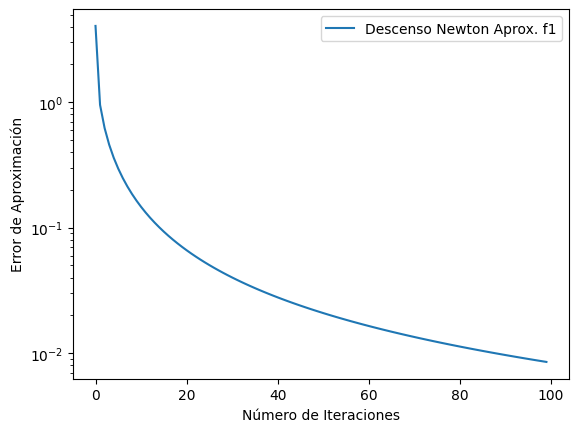

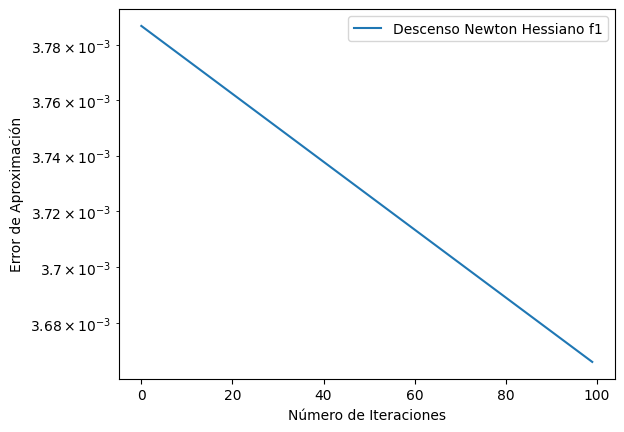

In [14]:
# Función para imprimir tabla con verificación de longitud
def imprimir_tabla(resultados, metodo):
    x_aprox, iteraciones, valores_f, errores, num_iter, convergencia = resultados
    num_iteraciones = min(len(iteraciones), len(errores))
    
    print(f"\nMétodo: {metodo}")
    print("Iteración\tAproximación x_k\tError\t\tNorma del Gradiente")
    
    # Imprimir primeras 3 iteraciones, asegurándonos que no exceda el tamaño de las listas
    for i in range(min(3, num_iteraciones)):  
        print(f"{i+1}\t\t{iteraciones[i]}\t{errores[i]:.6f}\t{np.linalg.norm(df1(iteraciones[i])):.6f}")
    
    # Imprimir últimas 3 iteraciones
    for i in range(max(0, num_iteraciones - 3), num_iteraciones):
        print(f"{i+1}\t\t{iteraciones[i]}\t{errores[i]:.6f}\t{np.linalg.norm(df1(iteraciones[i])):.6f}")
        
# Función para graficar
def graficar_errores(resultados, nombre):
    errores = resultados[3]
    plt.plot(errores, label=nombre)
    plt.yscale('log')  # Escala logarítmica para visualizar mejor la convergencia
    plt.xlabel("Número de Iteraciones")
    plt.ylabel("Error de Aproximación")
    plt.legend()

# Parámetros ajustados
alpha = 0.001  # Tamaño de paso reducido
maxIter = 100  # Número máximo de iteraciones
tol = 1e-6  # Tolerancia

# Ejecutar los algoritmos con el nuevo valor de alpha
f1_gradiente = descenso_gradiente_naive_aleatorio(f1, df1, x0, alpha, maxIter, tol)
f1_maximo = descenso_maximo_naive(f1, df1, x0, alpha, maxIter, tol)
f1_aprox = descenso_newton_aprox(f1, df1, ddf1, x0, alpha, maxIter, tol)
f1_hessiano = descenso_newton_hessiano(f1, df1, ddf1, x0, alpha, maxIter, tol)
imprimir_tabla(f1_gradiente, "Descenso Gradiente Naive Aleatorio f1")
imprimir_tabla(f1_maximo, "Descenso Máximo Naive f1")
imprimir_tabla(f1_aprox, "Descenso Newton Aprox. f1")
imprimir_tabla(f1_hessiano, "Descenso Newton Hessiano f1")

# Graficar errores
graficar_errores(f1_gradiente, "Descenso Gradiente Naive Aleatorio f1")
plt.show()
graficar_errores(f1_maximo, "Descenso Máximo Naive f1")
plt.show()
graficar_errores(f1_aprox, "Descenso Newton Aprox. f1")
plt.show()
graficar_errores(f1_hessiano, "Descenso Newton Hessiano f1")
plt.show()


### Función 2

$f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$

In [15]:
def f_rosenbrock_2d(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def df_rosenbrock_2d(x):
    dfdx1 = -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    dfdx2 = 200*(x[1] - x[0]**2)
    return np.array([dfdx1, dfdx2])

def ddf_rosenbrock_2d(x):
    d2fdx1 = -400*(x[1] - x[0]**2) + 800*x[0]**2 + 2
    d2fdx1dx2 = -400*x[0]
    d2fdx2 = 200
    return np.array([[d2fdx1, d2fdx1dx2], [d2fdx1dx2, d2fdx2]])



Método: Descenso Gradiente Naive Aleatorio f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[10. -5.]	0.000010	4056.039971
2		[ 9.9999916  -5.00000542]	0.000010	4056.030213
3		[10.00000061 -5.00000108]	0.000010	4056.040739
98		[10.00002855 -5.0001414 ]	0.000010	4056.080140
99		[10.00002851 -5.0001514 ]	0.000010	4056.080541
100		[10.00003559 -5.00015847]	0.000010	4056.089267

Método: Descenso Máximo Naive f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[10. -5.]	4.205426	4056.039971
2		[ 5.79982 -4.79   ]	0.894902	923.572230
3		[ 4.90822411 -4.71314418]	0.568507	658.530132
98		[ 0.41548444 -3.50166261]	0.009547	173.496249
99		[ 0.40938968 -3.49431403]	0.009458	172.393181
100		[ 0.4034049 -3.4869902]	0.009372	171.298734

Método: Descenso Newton Aprox. f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[10. -5.]	4.205426	4056.039971
2		[ 5.79982 -4.79   ]	0.894902	923.572230
3		[ 4.90822411 -4.71314418]	0.568507	658.530132
98		[ 0.41548444 -3.50166261]	0.0

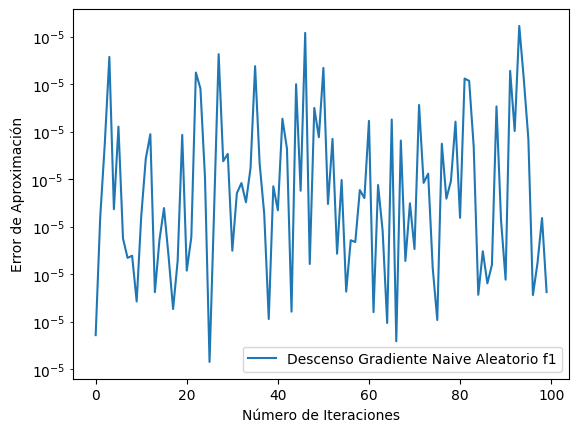

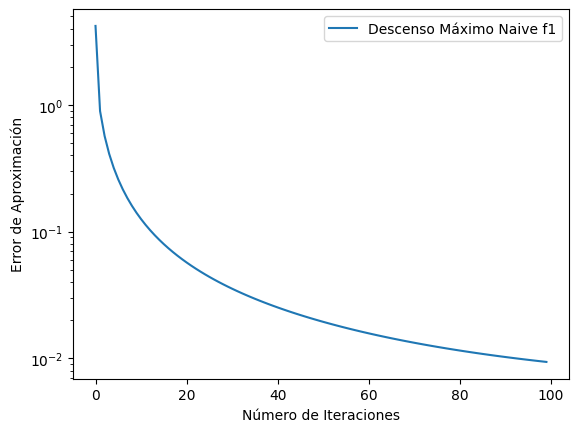

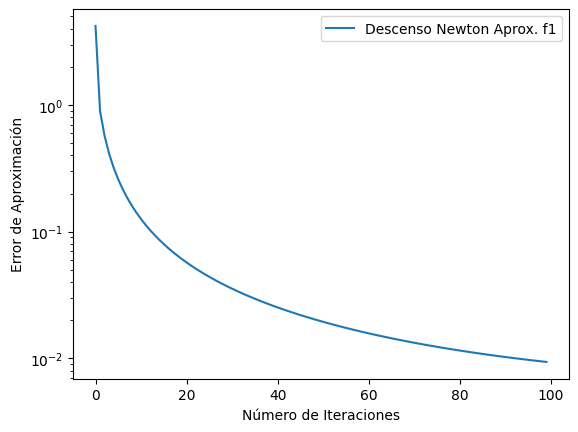

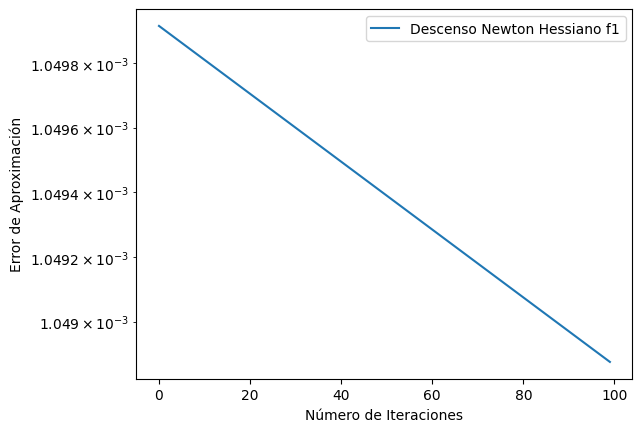

In [18]:
# Parámetros ajustados
alpha = 0.00001  # Tamaño de paso reducido
maxIter = 100  # Número máximo de iteraciones
tol = 1e-6  # Tolerancia

# Ejecutar los algoritmos con el nuevo valor de alpha
f2_gradiente = descenso_gradiente_naive_aleatorio(f_rosenbrock_2d, df_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_maximo = descenso_maximo_naive(f_rosenbrock_2d, df_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_aprox = descenso_newton_aprox(f_rosenbrock_2d, df_rosenbrock_2d, ddf_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_hessiano = descenso_newton_hessiano(f_rosenbrock_2d, df_rosenbrock_2d, ddf_rosenbrock_2d, x0, alpha, maxIter, tol)
imprimir_tabla(f2_gradiente, "Descenso Gradiente Naive Aleatorio f1")
imprimir_tabla(f2_maximo, "Descenso Máximo Naive f1")
imprimir_tabla(f2_aprox, "Descenso Newton Aprox. f1")
imprimir_tabla(f2_hessiano, "Descenso Newton Hessiano f1")

# Graficar errores
graficar_errores(f2_gradiente, "Descenso Gradiente Naive Aleatorio f1")
plt.show()
graficar_errores(f2_maximo, "Descenso Máximo Naive f1")
plt.show()
graficar_errores(f2_aprox, "Descenso Newton Aprox. f1")
plt.show()
graficar_errores(f2_hessiano, "Descenso Newton Hessiano f1")
plt.show()

### Función 3

$f(x) = \sum_{i=1}^{9} \left[ 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right]$

In [39]:
def f_rosenbrock_10d(x):
    return sum(100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

def df_rosenbrock_10d(x):
    grad = np.zeros_like(x)
    grad[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    grad[-1] = 200*(x[-1] - x[-2]**2)
    
    for i in range(1, len(x) - 1):
        grad[i] = 200*(x[i] - x[i-1]**2) - 400*x[i]*(x[i+1] - x[i]**2) - 2*(1 - x[i])
    return grad

# Hessiano no lo necesitas explícito para 10D porque es costoso computarlo, Newton con gradiente puede ser más eficiente.


In [ ]:
# Parámetros ajustados
alpha = 0.00001  # Tamaño de paso reducido
maxIter = 100  # Número máximo de iteraciones
tol = 1e-6  # Tolerancia

# Ejecutar los algoritmos con el nuevo valor de alpha
f2_gradiente = descenso_gradiente_naive_aleatorio(f_rosenbrock_2d, df_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_maximo = descenso_maximo_naive(f_rosenbrock_2d, df_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_aprox = descenso_newton_aprox(f_rosenbrock_2d, df_rosenbrock_2d, ddf_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_hessiano = descenso_newton_hessiano(f_rosenbrock_2d, df_rosenbrock_2d, ddf_rosenbrock_2d, x0, alpha, maxIter, tol)
imprimir_tabla(f2_gradiente, "Descenso Gradiente Naive Aleatorio f1")
imprimir_tabla(f2_maximo, "Descenso Máximo Naive f1")
imprimir_tabla(f2_aprox, "Descenso Newton Aprox. f1")
imprimir_tabla(f2_hessiano, "Descenso Newton Hessiano f1")

# Graficar errores
graficar_errores(f2_gradiente, "Descenso Gradiente Naive Aleatorio f1")
plt.show()
graficar_errores(f2_maximo, "Descenso Máximo Naive f1")
plt.show()
graficar_errores(f2_aprox, "Descenso Newton Aprox. f1")
plt.show()
graficar_errores(f2_hessiano, "Descenso Newton Hessiano f1")
plt.show()